# IPL Match Winning Prediction

# About IPL
The Indian Premier League, or IPL, is a professional Twenty20 cricket league in India. 
The league was founded in 2008 and has since become one of the most popular sporting events in India and around the world.
The IPL features ten franchise teams representing different cities in India, with players from around the world participating in the league.
The top four teams advance to the playoffs to determine the IPL champion. 
The league has seen many memorable moments and performances over the years, and is known for its exciting style of cricket, high-scoring matches, and enthusiastic crowds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matchdf = pd.read_csv('IPL_Matches_2008_2022.csv')
ballbyballdf = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
ballbyballdf.shape

(225954, 17)

In [4]:
print('Number of Rows in Ball By Ball all macthes data is',ballbyballdf.shape[0])
print('Number of Columns in Ball By Ball all macthes data is',ballbyballdf.shape[1])

Number of Rows in Ball By Ball all macthes data is 225954
Number of Columns in Ball By Ball all macthes data is 17


In [5]:
ballbyballdf.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
ballbyballdf.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [7]:
ballbyballdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [8]:
ballbyballdf.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


In [9]:
matchdf.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [10]:
matchdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [11]:
print('Number of Rows in Macthes data is',matchdf.shape[0])
print('Number of Columns in all Macthes data is',matchdf.shape[1])

Number of Rows in Macthes data is 950
Number of Columns in all Macthes data is 20


In [12]:
total_run_inning = ballbyballdf.groupby(['ID','innings']).sum()['total_run'].reset_index()

/tmp/ipykernel_40976/3155198578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_run_inning = ballbyballdf.groupby(['ID','innings']).sum()['total_run'].reset_index()


In [13]:
total_run_inning.head()

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


In [14]:
scores_inning_1 = total_run_inning[total_run_inning['innings']==1]

In [15]:
scores_inning_1.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [16]:
scores_inning_1['Target'] = scores_inning_1['total_run'] + 1

/tmp/ipykernel_40976/3707504411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_inning_1['Target'] = scores_inning_1['total_run'] + 1


In [17]:
scores_inning_1.head()

,ID,innings,total_run,Target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111


In [18]:
scores_inning_2 = total_run_inning[total_run_inning['innings']==2]

In [19]:
scores_inning_2.head()

,ID,innings,total_run
1,335982,2,82
3,335983,2,207
5,335984,2,132
7,335985,2,166
9,335986,2,112


/tmp/ipykernel_40976/2489295722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_inning_1['total_run'],color='g')
/tmp/ipykernel_40976/2489295722.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_inning_2['total_run'])


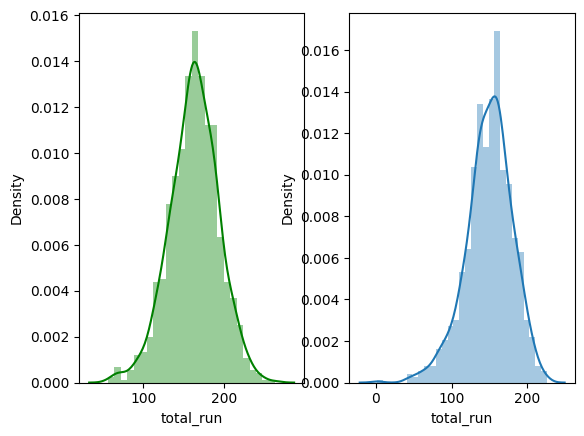

In [20]:
# plt.hist(scores_inning_1['total_run'],color='blue')
plt.subplot(1,2,1)
sns.distplot(scores_inning_1['total_run'],color='g')
plt.subplot(1,2,2)
sns.distplot(scores_inning_2['total_run'])
plt.show()

In [21]:
matchdf = matchdf.merge(scores_inning_1[['Target','ID']],on='ID')

In [22]:
matchdf.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [23]:
matchdf.shape

(950, 21)

In [24]:
matchdf.isna().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
Target               0
dtype: int64

In [25]:
matchdf.dropna(subset=['WinningTeam'],inplace=True)

In [26]:
matchdf['method'].unique()

array([nan, 'D/L'], dtype=object)

In [27]:
matchdf['method'].value_counts()

D/L    19
Name: method, dtype: int64

In [28]:
matchdf.drop(matchdf[matchdf['method'] == 'D/L'].index, inplace=True)

In [29]:
matchdf.drop('method',axis=1,inplace=True)

In [30]:
matchdf['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [31]:
matchdf['Team1'] = matchdf['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchdf['Team1'] = matchdf['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
matchdf['Team1'] = matchdf['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')


matchdf['Team2'] = matchdf['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchdf['Team2'] = matchdf['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
matchdf['Team2'] = matchdf['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')


matchdf['WinningTeam'] = matchdf['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchdf['WinningTeam'] = matchdf['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')
matchdf['WinningTeam'] = matchdf['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

matchdf['TossWinner'] = matchdf['TossWinner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchdf['TossWinner'] = matchdf['TossWinner'].str.replace('Kings XI Punjab','Punjab Kings')
matchdf['TossWinner'] = matchdf['TossWinner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [32]:
matchdf['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [33]:
matchdf['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [34]:
matchdf['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [35]:
matchdf['TossWinner'].unique()

array(['Rajasthan Royals', 'Lucknow Super Giants', 'Gujarat Titans',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings',
       'Punjab Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [36]:
matchdf['TossDecision'].unique()

array(['bat', 'field'], dtype=object)

In [37]:
matchdf.drop(matchdf[matchdf['Team1']=='Gujarat Lions'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team1']=='Rising Pune Supergiants'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team1']=='Pune Warriors'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team1']=='Kochi Tuskers Kerala'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team1']=='Rising Pune Supergiant'].index,inplace=True)


matchdf.drop(matchdf[matchdf['Team2']=='Gujarat Lions'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team2']=='Rising Pune Supergiants'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team2']=='Rising Pune Supergiant'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team2']=='Pune Warriors'].index,inplace=True)
matchdf.drop(matchdf[matchdf['Team2']=='Kochi Tuskers Kerala'].index,inplace=True)

In [38]:
matchdf['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [39]:
matchdf['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings'], dtype=object)

In [40]:
matchdf['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings'], dtype=object)

In [41]:
cols = ['Team1','Team2','WinningTeam']
for i in cols:
    print(f"Unique Count of Teams in Column {i} is {len(matchdf[i].unique())}")

Unique Count of Teams in Column Team1 is 10
Unique Count of Teams in Column Team2 is 10
Unique Count of Teams in Column WinningTeam is 10


In [42]:
matchdf.isna().sum()

ID                  0
City               51
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin             13
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
Target              0
dtype: int64

In [43]:
matchdf['Venue'][matchdf['City'].isna()].reset_index()

,index,Venue
0,134,Dubai International Cricket Stadium
1,137,Dubai International Cricket Stadium
2,138,Sharjah Cricket Stadium
3,140,Dubai International Cricket Stadium
4,142,Dubai International Cricket Stadium
5,143,Sharjah Cricket Stadium
6,145,Dubai International Cricket Stadium
7,147,Dubai International Cricket Stadium
8,148,Sharjah Cricket Stadium
9,150,Dubai International Cricket Stadium


In [44]:
for i in matchdf[matchdf['City'].isna()]['Venue']:
    if i == "Dubai International Cricket Stadium":
        matchdf['City'].fillna("Dubai",inplace=True)
    else:
        i == "Sharjah Cricket Stadium"
        matchdf['City'].fillna("Sharjah",inplace=True)

In [45]:
matchdf.isna().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin             13
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
Target              0
dtype: int64

In [46]:
matchdf.drop(['Date','Season','MatchNumber','Venue','SuperOver','WonBy','Margin',
              'Player_of_Match','Team1Players','Team2Players','Umpire1','Umpire2'],axis=1,inplace=True)

In [47]:
# 'TossWinner','TossDecision', added cols

In [48]:
matchdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,Punjab Kings,158


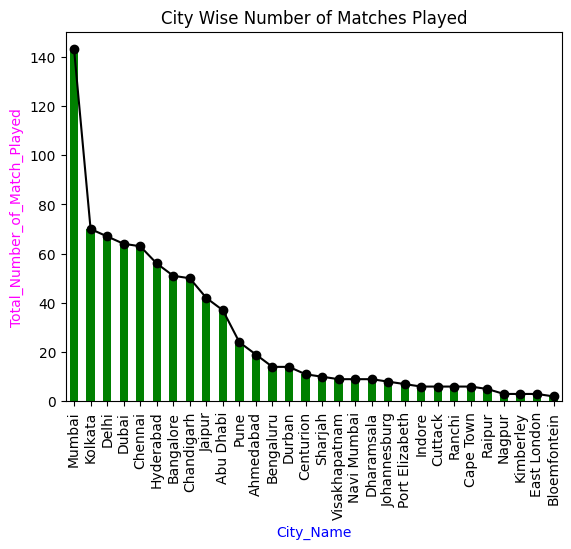

In [49]:
matchdf['City'].value_counts().plot(kind='bar',color='g')
plt.plot(matchdf['City'].value_counts(),marker='o',color='black')
plt.xlabel('City_Name',color='b')
plt.ylabel('Total_Number_of_Match_Played',color='magenta')
plt.title("City Wise Number of Matches Played")
plt.show()

In [50]:
matchdf.to_csv("Plot1")

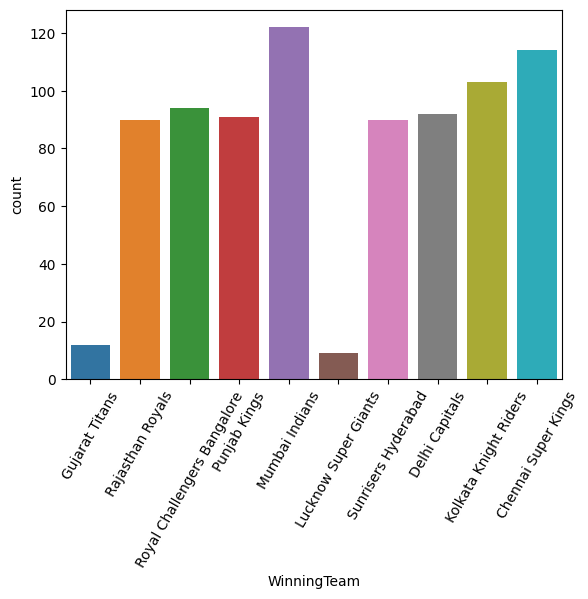

In [51]:
sns.countplot(x='WinningTeam',data=matchdf,orient="180")
plt.xticks(rotation=60)
plt.show()

In [52]:
matchdf.isna().sum()

ID              0
City            0
Team1           0
Team2           0
TossWinner      0
TossDecision    0
WinningTeam     0
Target          0
dtype: int64

In [53]:
ballbyballdf.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [54]:
ballbyballdf['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [55]:
ballbyballdf['BattingTeam'] = ballbyballdf['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
ballbyballdf['BattingTeam'] = ballbyballdf['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')
ballbyballdf['BattingTeam'] = ballbyballdf['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

In [56]:
ballbyballdf['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [57]:
ballbyballdf.drop(ballbyballdf[ballbyballdf['BattingTeam']=='Gujarat Lions'].index,inplace=True)
ballbyballdf.drop(ballbyballdf[ballbyballdf['BattingTeam']=='Rising Pune Supergiants'].index,inplace=True)
ballbyballdf.drop(ballbyballdf[ballbyballdf['BattingTeam']=='Pune Warriors'].index,inplace=True)
ballbyballdf.drop(ballbyballdf[ballbyballdf['BattingTeam']=='Kochi Tuskers Kerala'].index,inplace=True)
ballbyballdf.drop(ballbyballdf[ballbyballdf['BattingTeam']=='Rising Pune Supergiant'].index,inplace=True)

In [58]:
print(f"Unique Count of Teams in Column Batting Team is {len(ballbyballdf['BattingTeam'].unique())}")

Unique Count of Teams in Column Batting Team is 10


In [59]:
ballbyballdf = matchdf.merge(ballbyballdf,on='ID')

In [60]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,1,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,1,0,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,1,0,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,1,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,1,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [61]:
ballbyballdf['BattingTeam'].value_counts()

Mumbai Indians                 25727
Sunrisers Hyderabad            25003
Royal Challengers Bangalore    24213
Delhi Capitals                 24015
Kolkata Knight Riders          23926
Chennai Super Kings            23885
Punjab Kings                   23775
Rajasthan Royals               21790
Gujarat Titans                  1971
Lucknow Super Giants            1840
Name: BattingTeam, dtype: int64

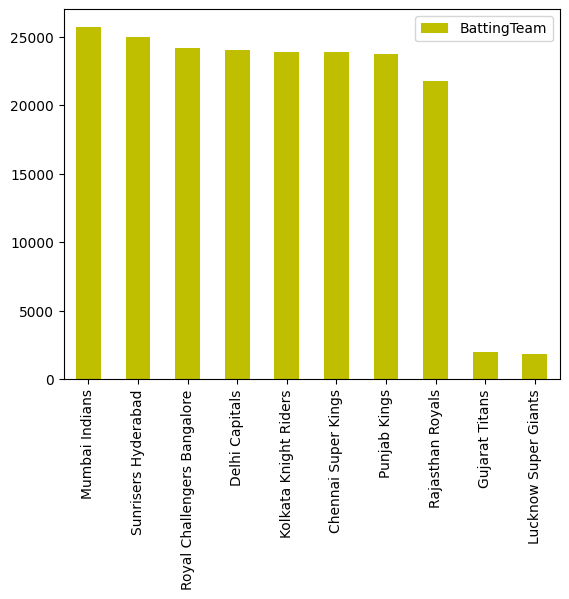

In [62]:
ballbyballdf['BattingTeam'].value_counts().plot(kind='bar',color='y')
plt.legend()
plt.show()

In [63]:
ballbyballdf = ballbyballdf[ballbyballdf['innings']==2]

In [64]:
ballbyballdf.shape

(95056, 24)

In [65]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [66]:
ballbyballdf.columns

Index(['ID', 'City', 'Team1', 'Team2', 'TossWinner', 'TossDecision',
       'WinningTeam', 'Target', 'innings', 'overs', 'ballnumber', 'batter',
       'bowler', 'non-striker', 'extra_type', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [67]:
ballbyballdf['Current_score'] = ballbyballdf.groupby('ID')['total_run'].cumsum()

In [68]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [69]:
ballbyballdf['Runs_required'] = np.where((ballbyballdf['Target']-ballbyballdf['Current_score'])>=0,ballbyballdf['Target']-ballbyballdf['Current_score'],0)

In [70]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Current_score,Runs_required
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130


In [71]:
ballbyballdf['Balls_left'] = np.where((120-ballbyballdf['overs']*6-ballbyballdf['ballnumber'])>=0,(120-ballbyballdf['overs']*6-ballbyballdf['ballnumber']),0)

In [72]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Current_score,Runs_required,Balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115


In [73]:
ballbyballdf['Current_runrate'] = ballbyballdf['Current_score'] / (ballbyballdf['overs'] +( ballbyballdf['ballnumber']/6))

In [74]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Current_score,Runs_required,Balls_left,Current_runrate
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,0.0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,0.0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,2.0
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,1.5
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,1.2


In [75]:
ballbyballdf['Required_runrate'] = np.where(ballbyballdf['Balls_left']>0,(ballbyballdf['Runs_required']*6)/ballbyballdf['Balls_left'],0)

In [76]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Current_score,Runs_required,Balls_left,Current_runrate,Required_runrate
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,0.0,6.605042
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,0.0,6.661017
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,2.0,6.666667
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,1.5,6.724138
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,1.2,6.782609


In [77]:
ballbyballdf.isna().sum()

ID                       0
City                     0
Team1                    0
Team2                    0
TossWinner               0
TossDecision             0
WinningTeam              0
Target                   0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           90017
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           90379
kind                 90379
fielders_involved    91744
BattingTeam              0
Current_score            0
Runs_required            0
Balls_left               0
Current_runrate          0
Required_runrate         0
dtype: int64

In [78]:
ballbyballdf['isWicketDelivery'][:30]

120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
128    0
129    1
130    0
131    0
132    0
133    0
134    0
135    0
136    0
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    1
148    0
149    0
Name: isWicketDelivery, dtype: int64

In [79]:
ballbyballdf['Wicket_left'] = 10-ballbyballdf.groupby('ID')['isWicketDelivery'].cumsum()

In [80]:
ballbyballdf['Result'] = np.where(ballbyballdf['WinningTeam']==ballbyballdf['BattingTeam'],1,0)

In [81]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,kind,fielders_involved,BattingTeam,Current_score,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,NaN,Gujarat Titans,0,131,119,0.0,6.605042,10,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,NaN,Gujarat Titans,0,131,118,0.0,6.661017,10,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,NaN,Gujarat Titans,1,130,117,2.0,6.666667,10,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,NaN,Gujarat Titans,1,130,116,1.5,6.724138,10,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,NaN,Gujarat Titans,1,130,115,1.2,6.782609,10,1


In [82]:
ballbyballdf['Wicket_left'][90:120]

210     7
211     7
212     7
213     7
214     7
215     7
216     7
217     7
218     7
219     7
220     7
221     7
222     7
223     7
224     7
225     7
226     7
227     7
228     7
229     7
230     7
231     7
232     7
360    10
361    10
362    10
363    10
364    10
365    10
366    10
Name: Wicket_left, dtype: int64

In [83]:
ballbyballdf[ballbyballdf['Result']==0]

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,kind,fielders_involved,BattingTeam,Current_score,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result
595,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,208,2,0,...,NaN,NaN,Lucknow Super Giants,0,208,119,0.000000,10.487395,10,0
596,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,208,2,0,...,NaN,NaN,Lucknow Super Giants,0,208,118,0.000000,10.576271,10,0
597,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,208,2,0,...,NaN,NaN,Lucknow Super Giants,1,207,117,2.000000,10.615385,10,0
598,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,208,2,0,...,NaN,NaN,Lucknow Super Giants,2,206,116,3.000000,10.655172,10,0
599,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,208,2,0,...,NaN,NaN,Lucknow Super Giants,8,200,115,9.600000,10.434783,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196140,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,223,2,14,...,NaN,NaN,Royal Challengers Bangalore,80,143,31,5.393258,27.677419,1,0
196141,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,223,2,14,...,NaN,NaN,Royal Challengers Bangalore,81,142,30,5.400000,28.400000,1,0
196142,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,223,2,14,...,NaN,NaN,Royal Challengers Bangalore,81,142,29,5.340659,29.379310,1,0
196143,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,223,2,15,...,NaN,NaN,Royal Challengers Bangalore,82,141,29,5.406593,29.172414,1,0


In [84]:
ballbyballdf['BowlingTeam'] = np.where(ballbyballdf['Team1']==ballbyballdf['BattingTeam'],ballbyballdf['Team2'],ballbyballdf['Team1'])

In [85]:
ballbyballdf.head()

,ID,City,Team1,Team2,TossWinner,TossDecision,WinningTeam,Target,innings,overs,...,fielders_involved,BattingTeam,Current_score,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,Gujarat Titans,0,131,119,0.0,6.605042,10,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,Gujarat Titans,0,131,118,0.0,6.661017,10,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,Gujarat Titans,1,130,117,2.0,6.666667,10,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,Gujarat Titans,1,130,116,1.5,6.724138,10,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,131,2,0,...,NaN,Gujarat Titans,1,130,115,1.2,6.782609,10,1,Rajasthan Royals


In [86]:
ballbyballdf.corr()

/tmp/ipykernel_40976/2444205750.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ballbyballdf.corr()


,ID,Target,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,Current_score,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result
ID,1.000000,0.144211,NaN,0.010674,-0.000145,0.024840,-0.014187,0.021964,0.000383,0.000155,0.054924,0.031658,-0.010657,0.104049,0.017023,0.004827,0.003942
Target,0.144211,1.000000,NaN,0.071237,0.007498,0.057622,0.000529,0.058141,-0.004888,0.032779,0.194266,0.394294,-0.071571,0.252934,0.264228,-0.169595,-0.433696
innings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overs,0.010674,0.071237,NaN,1.000000,-0.011348,0.066741,-0.001094,0.066976,-0.001726,0.067375,0.940419,-0.839990,-0.998536,0.186303,0.246253,-0.752175,-0.054237
ballnumber,-0.000145,0.007498,NaN,-0.011348,1.000000,0.000665,-0.000723,0.000514,-0.004258,0.004117,0.040669,-0.033760,-0.042745,0.020835,0.021538,-0.033499,-0.004929
batsman_run,0.024840,0.057622,NaN,0.066741,0.000665,1.000000,-0.139392,0.977065,0.017739,-0.169333,0.115014,-0.074269,-0.066717,0.229808,-0.009961,0.010504,0.043561
extras_run,-0.014187,0.000529,NaN,-0.001094,-0.000723,-0.139392,1.000000,0.074667,-0.001670,-0.041589,0.001866,-0.001437,0.001133,0.025598,0.001607,0.001501,0.001886
total_run,0.021964,0.058141,NaN,0.066976,0.000514,0.977065,0.074667,1.000000,0.017505,-0.179469,0.116225,-0.075101,-0.066943,0.236931,-0.009685,0.010901,0.044273
non_boundary,0.000383,-0.004888,NaN,-0.001726,-0.004258,0.017739,-0.001670,0.017505,1.000000,-0.001952,-0.000996,-0.001885,0.001955,0.002406,-0.002343,0.004135,0.003286
isWicketDelivery,0.000155,0.032779,NaN,0.067375,0.004117,-0.169333,-0.041589,-0.179469,-0.001952,1.000000,0.057772,-0.035273,-0.067535,-0.013887,0.052905,-0.162756,-0.073362


In [87]:
ballbyballdf.columns

Index(['ID', 'City', 'Team1', 'Team2', 'TossWinner', 'TossDecision',
       'WinningTeam', 'Target', 'innings', 'overs', 'ballnumber', 'batter',
       'bowler', 'non-striker', 'extra_type', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'Current_score', 'Runs_required',
       'Balls_left', 'Current_runrate', 'Required_runrate', 'Wicket_left',
       'Result', 'BowlingTeam'],
      dtype='object')

In [88]:
ballbyballdf.drop(['Team1', 'Team2', 'WinningTeam','innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved','Current_score'],axis=1,inplace=True)

In [89]:
# ballbyballdf.to_excel("final.xlsx")

In [90]:
ballbyballdf.drop(['ID'],axis=1,inplace=True)

In [91]:
ballbyballdf.head()

,City,TossWinner,TossDecision,Target,BattingTeam,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result,BowlingTeam
120,Ahmedabad,Rajasthan Royals,bat,131,Gujarat Titans,131,119,0.0,6.605042,10,1,Rajasthan Royals
121,Ahmedabad,Rajasthan Royals,bat,131,Gujarat Titans,131,118,0.0,6.661017,10,1,Rajasthan Royals
122,Ahmedabad,Rajasthan Royals,bat,131,Gujarat Titans,130,117,2.0,6.666667,10,1,Rajasthan Royals
123,Ahmedabad,Rajasthan Royals,bat,131,Gujarat Titans,130,116,1.5,6.724138,10,1,Rajasthan Royals
124,Ahmedabad,Rajasthan Royals,bat,131,Gujarat Titans,130,115,1.2,6.782609,10,1,Rajasthan Royals


In [92]:
ballbyballdf.columns

Index(['City', 'TossWinner', 'TossDecision', 'Target', 'BattingTeam',
       'Runs_required', 'Balls_left', 'Current_runrate', 'Required_runrate',
       'Wicket_left', 'Result', 'BowlingTeam'],
      dtype='object')

In [93]:
ballbyballdf.shape

(95056, 12)

In [94]:
ballbyballdf.isna().sum()

City                0
TossWinner          0
TossDecision        0
Target              0
BattingTeam         0
Runs_required       0
Balls_left          0
Current_runrate     0
Required_runrate    0
Wicket_left         0
Result              0
BowlingTeam         0
dtype: int64

In [95]:
ballbyballdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95056 entries, 120 to 196144
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              95056 non-null  object 
 1   TossWinner        95056 non-null  object 
 2   TossDecision      95056 non-null  object 
 3   Target            95056 non-null  int64  
 4   BattingTeam       95056 non-null  object 
 5   Runs_required     95056 non-null  int64  
 6   Balls_left        95056 non-null  int64  
 7   Current_runrate   95056 non-null  float64
 8   Required_runrate  95056 non-null  float64
 9   Wicket_left       95056 non-null  int64  
 10  Result            95056 non-null  int64  
 11  BowlingTeam       95056 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.4+ MB


In [96]:
ballbyballdf.describe()

,Target,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result
count,95056.000000,95056.000000,95056.000000,95056.000000,95056.000000,95056.000000,95056.000000
mean,166.372086,93.099762,62.528068,7.407374,10.666263,7.532907,0.523060
std,28.745818,49.871646,33.429515,2.227865,13.174401,2.155106,0.499471
min,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.000000,54.000000,34.000000,6.272727,7.212605,6.000000,0.000000
50%,166.000000,92.000000,63.000000,7.469988,8.941176,8.000000,1.000000
75%,186.000000,131.000000,91.000000,8.636364,11.035714,9.000000,1.000000
max,247.000000,247.000000,119.000000,36.000000,714.000000,10.000000,1.000000


In [97]:
ballbyballdf.corr()

/tmp/ipykernel_40976/2444205750.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ballbyballdf.corr()


,Target,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result
Target,1.000000,0.394294,-0.071571,0.252934,0.264228,-0.169595,-0.433696
Runs_required,0.394294,1.000000,0.841108,-0.230187,-0.035318,0.492834,-0.257257
Balls_left,-0.071571,0.841108,1.000000,-0.187278,-0.247253,0.753318,0.054434
Current_runrate,0.252934,-0.230187,-0.187278,1.000000,-0.020459,0.031660,0.129521
Required_runrate,0.264228,-0.035318,-0.247253,-0.020459,1.000000,-0.372789,-0.253818
Wicket_left,-0.169595,0.492834,0.753318,0.031660,-0.372789,1.000000,0.327682
Result,-0.433696,-0.257257,0.054434,0.129521,-0.253818,0.327682,1.000000


In [98]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# ballbyballdf['City'] = le.fit_transform(ballbyballdf['City'])
# ballbyballdf['BattingTeam'] = le.fit_transform(ballbyballdf['BattingTeam'])
# ballbyballdf['BowlingTeam'] = le.fit_transform(ballbyballdf['BowlingTeam'])
# ballbyballdf['TossWinner'] = le.fit_transform(ballbyballdf['TossWinner'])
# ballbyballdf['TossDecision'] = le.fit_transform(ballbyballdf['TossDecision'])

In [99]:
from sklearn.preprocessing import LabelEncoder
cat_var = ['City','BattingTeam','BowlingTeam','TossWinner','TossDecision']
encoder=LabelEncoder()
classes_and_values = {}
for col in cat_var:
    ballbyballdf[col]=encoder.fit_transform(ballbyballdf[col])
    classes = encoder.classes_
    assigned_values = encoder.transform(classes)

    # Store the classes and their assigned values in the dictionary
    classes_and_values[col] = dict(zip(classes, assigned_values))



for column, values in classes_and_values.items():
    print(f"Column: {column}")
    for label, value in values.items():
        print(f"Label: {label}, Assigned Value: {value}")
    print()

Column: City
Label: Abu Dhabi, Assigned Value: 0
Label: Ahmedabad, Assigned Value: 1
Label: Bangalore, Assigned Value: 2
Label: Bengaluru, Assigned Value: 3
Label: Bloemfontein, Assigned Value: 4
Label: Cape Town, Assigned Value: 5
Label: Centurion, Assigned Value: 6
Label: Chandigarh, Assigned Value: 7
Label: Chennai, Assigned Value: 8
Label: Cuttack, Assigned Value: 9
Label: Delhi, Assigned Value: 10
Label: Dharamsala, Assigned Value: 11
Label: Dubai, Assigned Value: 12
Label: Durban, Assigned Value: 13
Label: East London, Assigned Value: 14
Label: Hyderabad, Assigned Value: 15
Label: Indore, Assigned Value: 16
Label: Jaipur, Assigned Value: 17
Label: Johannesburg, Assigned Value: 18
Label: Kimberley, Assigned Value: 19
Label: Kolkata, Assigned Value: 20
Label: Mumbai, Assigned Value: 21
Label: Nagpur, Assigned Value: 22
Label: Navi Mumbai, Assigned Value: 23
Label: Port Elizabeth, Assigned Value: 24
Label: Pune, Assigned Value: 25
Label: Raipur, Assigned Value: 26
Label: Ranchi, Ass

In [100]:
import pickle
pickle.dump(classes_and_values,open('classes_dict.pkl','wb'))

In [101]:
x=ballbyballdf.drop('Result',axis=1)
y=ballbyballdf['Result']

In [102]:
col_names = x.columns
col_names

Index(['City', 'TossWinner', 'TossDecision', 'Target', 'BattingTeam',
       'Runs_required', 'Balls_left', 'Current_runrate', 'Required_runrate',
       'Wicket_left', 'BowlingTeam'],
      dtype='object')

In [103]:
ballbyballdf.loc[400:410]

,City,TossWinner,TossDecision,Target,BattingTeam,Runs_required,Balls_left,Current_runrate,Required_runrate,Wicket_left,Result,BowlingTeam
400,1,7,1,158,7,85,79,10.682927,6.455696,9,1,8
401,1,7,1,158,7,81,78,11.000000,6.230769,9,1,8
402,1,7,1,158,7,81,77,10.744186,6.311688,9,1,8
403,1,7,1,158,7,80,76,10.636364,6.315789,9,1,8
404,1,7,1,158,7,79,75,10.533333,6.320000,9,1,8
405,1,7,1,158,7,78,74,10.434783,6.324324,9,1,8
406,1,7,1,158,7,78,73,10.212766,6.410959,9,1,8
407,1,7,1,158,7,77,72,10.125000,6.416667,9,1,8
408,1,7,1,158,7,76,71,10.040816,6.422535,9,1,8
409,1,7,1,158,7,70,70,10.560000,6.000000,9,1,8


In [104]:
ballbyballdf.shape

(95056, 12)

In [105]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x = scaler.fit_transform(x)
# x = pd.DataFrame(x,columns=col_names)

In [106]:
# import pickle
# pickle.dump(scaler,open('scaler.pkl','wb'))

In [107]:
# x

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.8)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=100,penalty='l2')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Accuracy={:.2f}%".format(logreg.score(x_test, y_test)*100))

Accuracy=78.15%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     36266
           1       0.78      0.81      0.80     39779

    accuracy                           0.78     76045
   macro avg       0.78      0.78      0.78     76045
weighted avg       0.78      0.78      0.78     76045



In [111]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             n_iter=20,cv=5,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [112]:
acc1=rs_log_reg.best_score_
acc1

0.7829157274020082

In [113]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

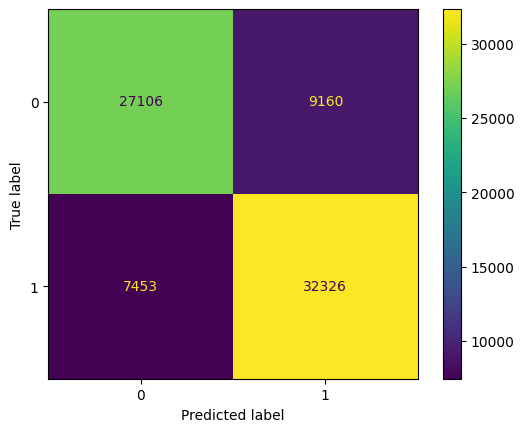

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [115]:
from  sklearn.svm import SVC
model_svm = SVC(probability=True)
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     36266
           1       0.77      0.81      0.79     39779

    accuracy                           0.78     76045
   macro avg       0.78      0.78      0.78     76045
weighted avg       0.78      0.78      0.78     76045



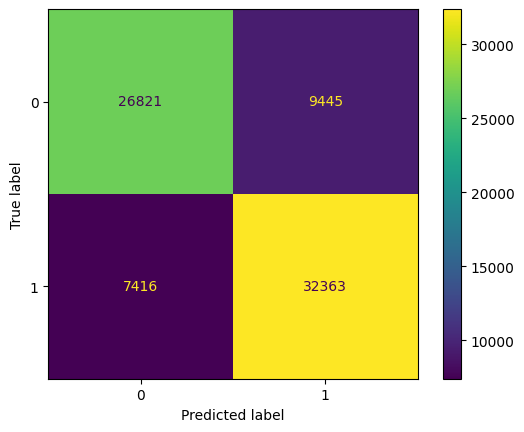

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [118]:
test_data = [[0,0,1,176,5,80,48,8,10,7,0]]
model_svm.predict(test_data)
model_svm.predict_proba(test_data)

array([[0.60179478, 0.39820522]])

In [119]:
# model = SVC(probability=True)
# model.fit(x_train, y_train)
# results = model.predict_proba(test_data)[0]

In [120]:
# results

In [121]:
# results = model.predict_proba(test_data)
# results

In [122]:
# model.predict(test_data)

In [123]:
# print(model.get_params())

In [124]:
# gets a dictionary of {'class_name': probability}
# prob_per_class_dictionary = dict(zip(model.classes_, results))

# gets a list of ['most_probable_class', 'second_most_probable_class', ..., 'least_class']
# results_ordered_by_probability = map(lambda x: x[0], sorted(zip(model.classes_, results), key=lambda x: x[1], reverse=True))

In [125]:
# #Hyperparamter tuning using Gridsearch
# svm = SVC()
# from sklearn.model_selection import GridSearchCV
# # param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
# param_grid = {'C': [10],
#               'gamma': [.1],
#               'kernel': ['rbf']}
# grid = GridSearchCV(svm,param_grid)

In [126]:
# grid.fit(x_train,y_train)

In [127]:
# grid_svc = grid.predict(x_test)
# accuracy_score(y_test,grid_svc)

In [128]:
# print(classification_report(y_test,grid_svc))

In [129]:
# print(grid.best_params_)
# print(grid.best_estimator_.get_params())

In [130]:
from  sklearn.svm import SVC
model_svm1 = SVC(C=10,gamma=.05,kernel='rbf',probability=True)
model_svm1.fit(x_train,y_train)

SVC(C=10, gamma=0.05, probability=True)

In [131]:
y_pred = model_svm1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     36266
           1       0.88      0.93      0.90     39779

    accuracy                           0.90     76045
   macro avg       0.90      0.90      0.90     76045
weighted avg       0.90      0.90      0.90     76045



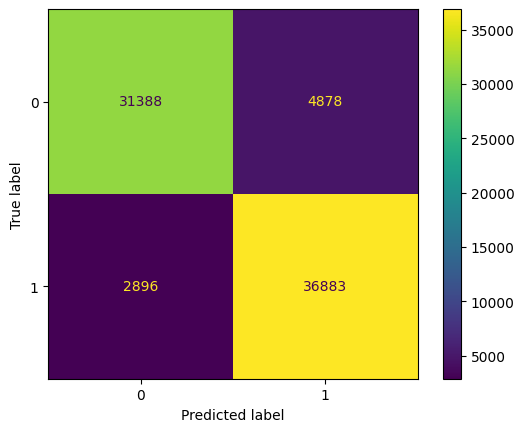

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [137]:
import pickle
with open('svm.pkl','wb') as file1:
    pickle.dump(model_svm,file1)    
    file1.close()

In [134]:
# result 1 if batting team wins
# result 0 if bowling team wins

In [135]:
test_data = [[0,0,1,176,5,80,48,8,10,7,0]]
model_svm1.predict(test_data)
model_svm1.predict_proba(test_data)

array([[0.52449554, 0.47550446]])